In [3]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Problem Statement -: To predict no of wins for a team based on certain other variables</strong>

In [4]:
data = pd.read_csv('baseball.csv')

data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<strong>
    Information About Columns-:<br>
    W - Wins || Outcome Variale || Continuos<br>
    R - Runs || Continuos<br> AB - At Bats || Continuos<br>H - Hits || Continuos<br>2B- Doubles || Continuos<br> 3B -Triples || Continuos<br> HR - Homeruns || Continuos<br> BB -Walks || Continuos<br> SO -Strikeouts || Continuos<br> SB - Stolen Bases || Continuos<br> RA - Runs Allowed || Continuos<br>ER - Earned Runs || Continuos<br>ERA - Earned Run Average || Continuos<br> SHO - Shutouts|| Continuos<br> SV - Saves|| Continuos<br> CG - Complete Games || Continuos<br> E - Errors || Continuos<br>
</strong>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<strong>DataSet has no null values</strong>

In [9]:
data.shape

(30, 17)

<b>Data has 30 rows and 17 columns</b>

<h3>Exploratory Data Analysis</h3>

<h4>Scatter Plots</h4>

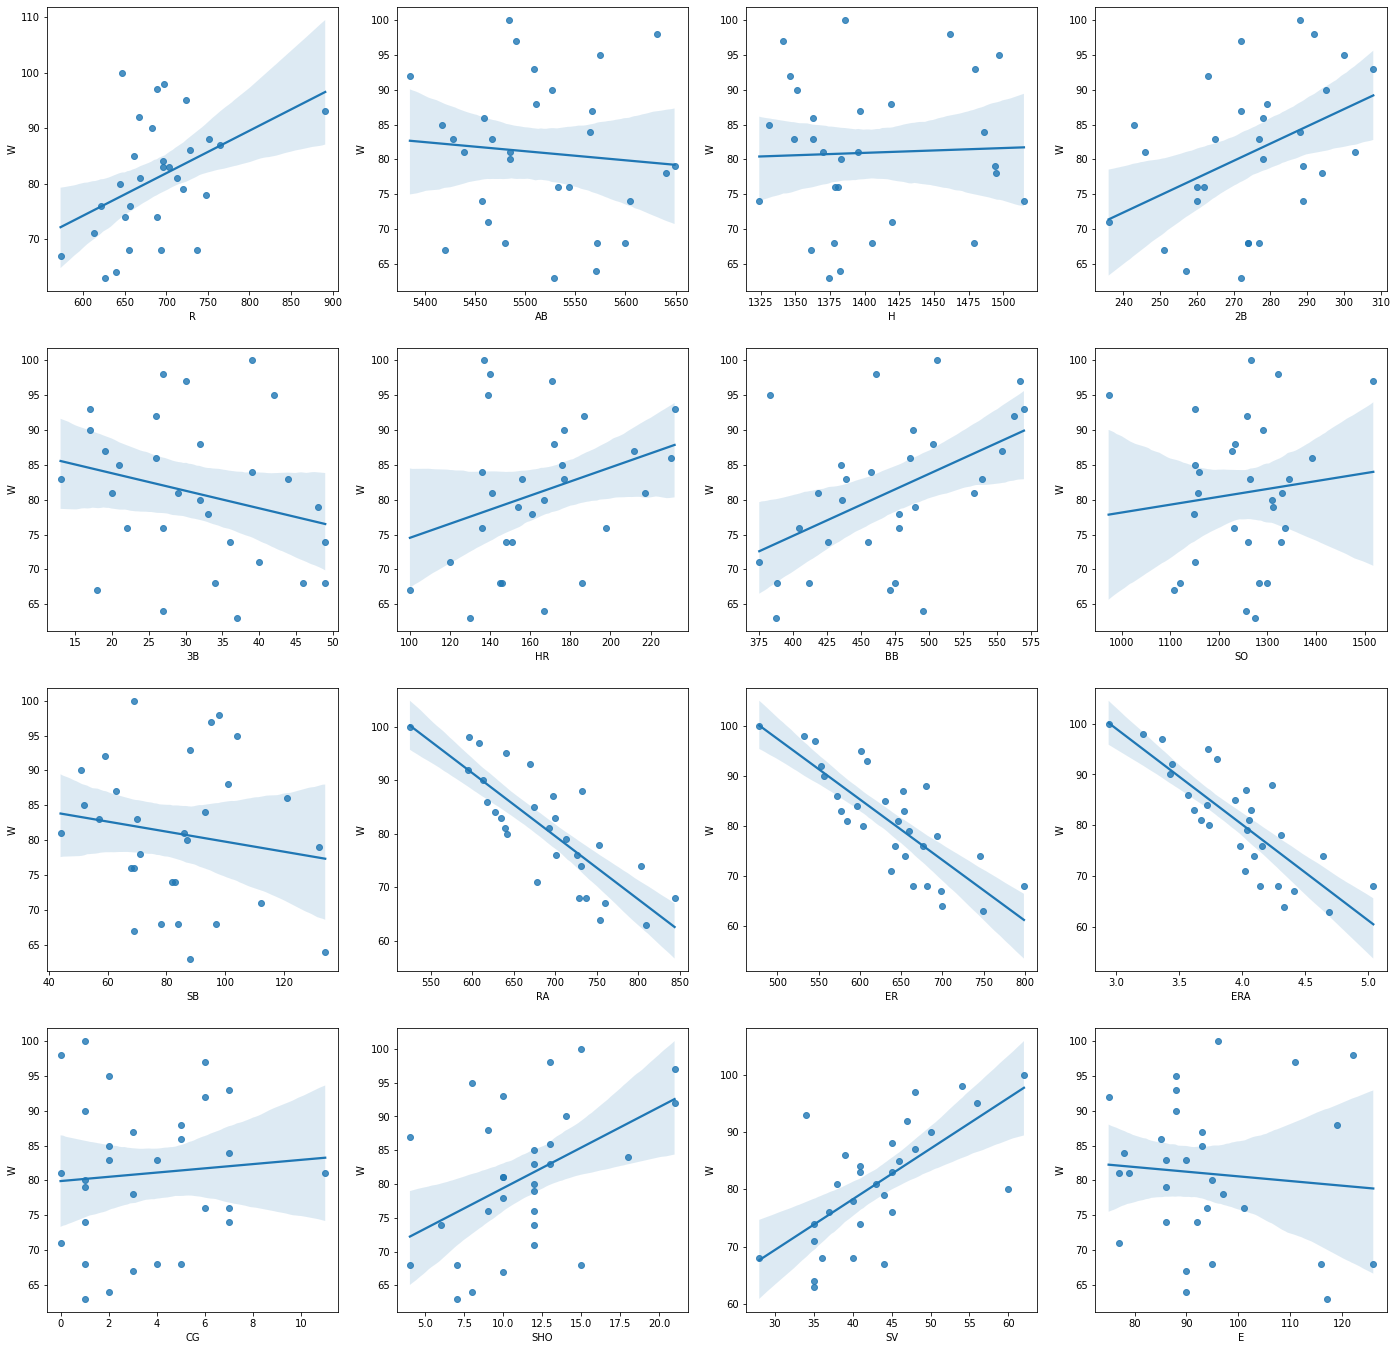

In [11]:
cols = ['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']

plotnumber=1
plt.figure(figsize=(24,24))
for col in cols:
    plt.subplot(4,4, plotnumber)
    sns.regplot(col, 'W', data=data)
    plotnumber+=1

<ul>
    <li>W has upwards trend with R</li>
    <li>W has no trend with AB</li>
    <li>W has no trend with H</li>
    <li>W has upwards trend with 2B</li>
    <li>W has downwards trend with 3B</li>
    <li>W has upwards trend with HR</li>
    <li>W has no trend with BB</li>
    <li>W has slight upward trend with SO</li>
    <li>W has slight downward trend with SB</li>
    <li>W has downward trend with RA</li>
    <li>W has downward trend with ER</li>
    <li>W has downward trend with ERA</li>
    <li>W has no trend with CG</li>
    <li>W has upwards trend with SHO</li>
    <li>W has upwards trend with SV</li>
    <li>W has slight downward trend with E</li>
</ul>

<h4>Distribution Plots</h4>

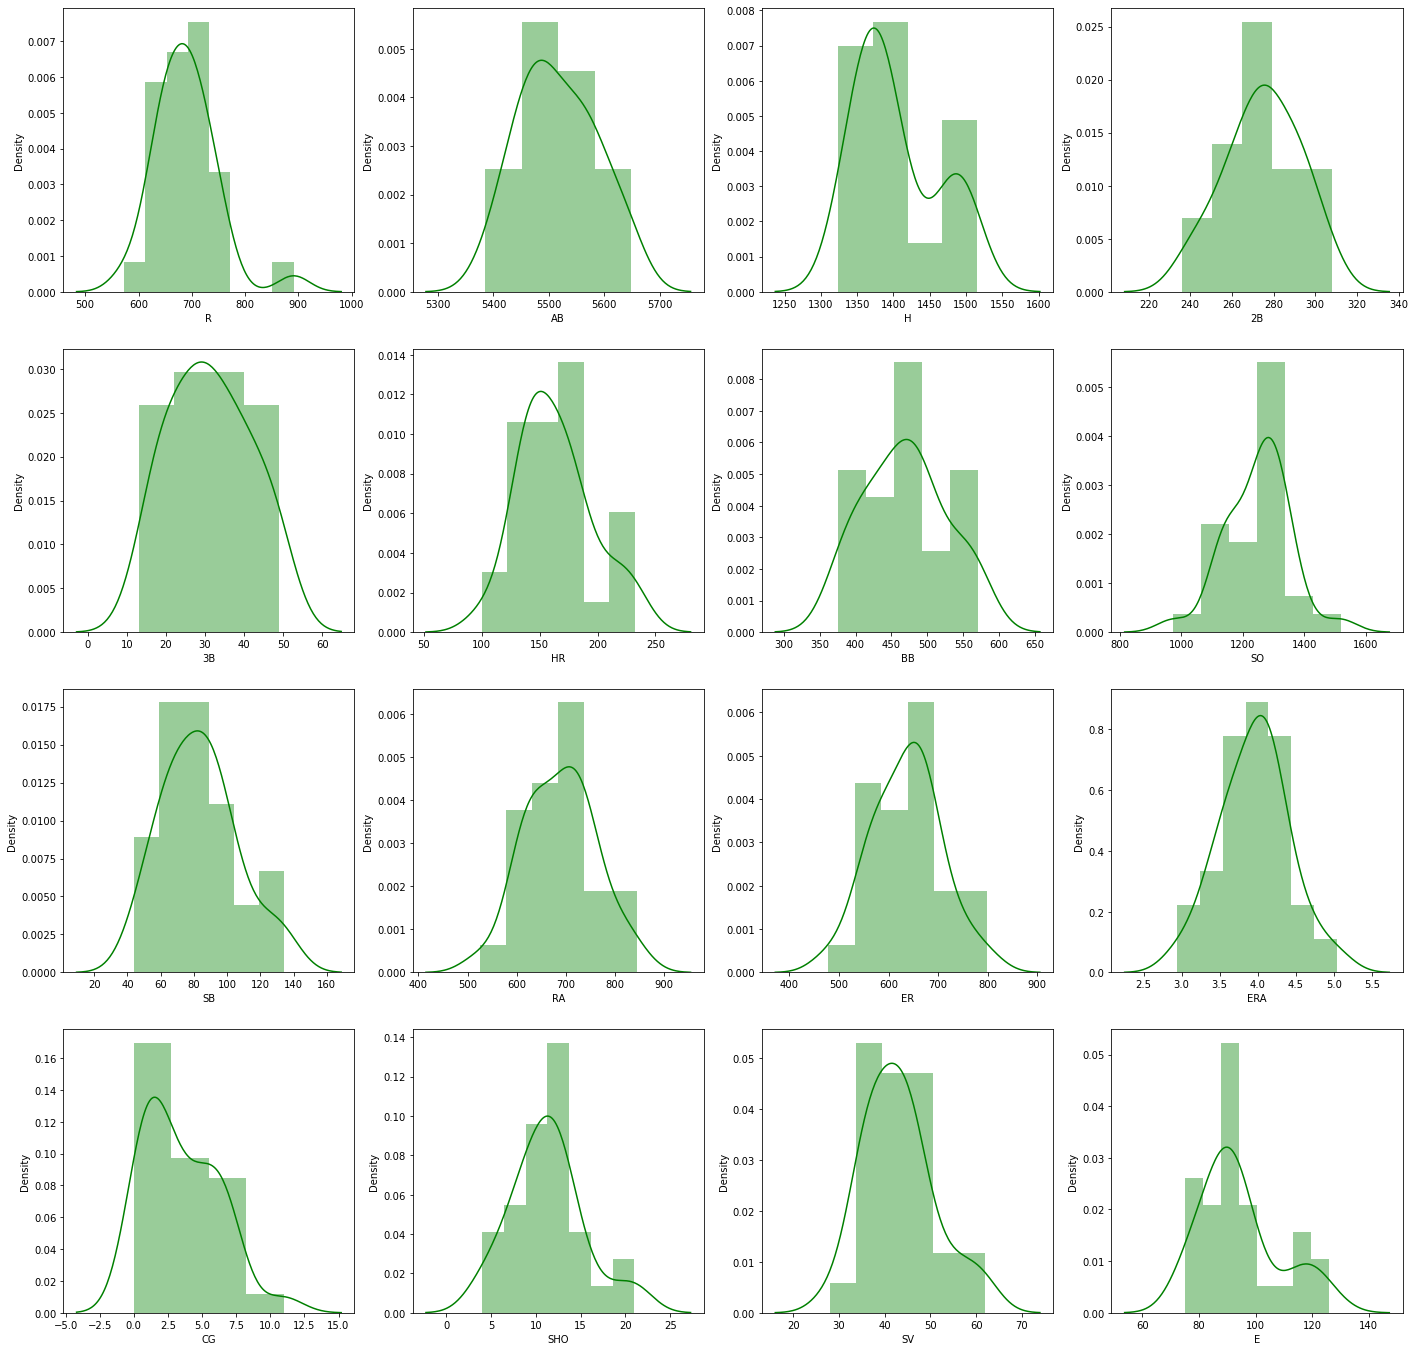

In [15]:
plotnumber=1
plt.figure(figsize=(24,24))
for col in cols:
    plt.subplot(4,4, plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

<strong>All variables are failry close to normal</strong>

<h4>Correlation Matrix</h4>

In [16]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


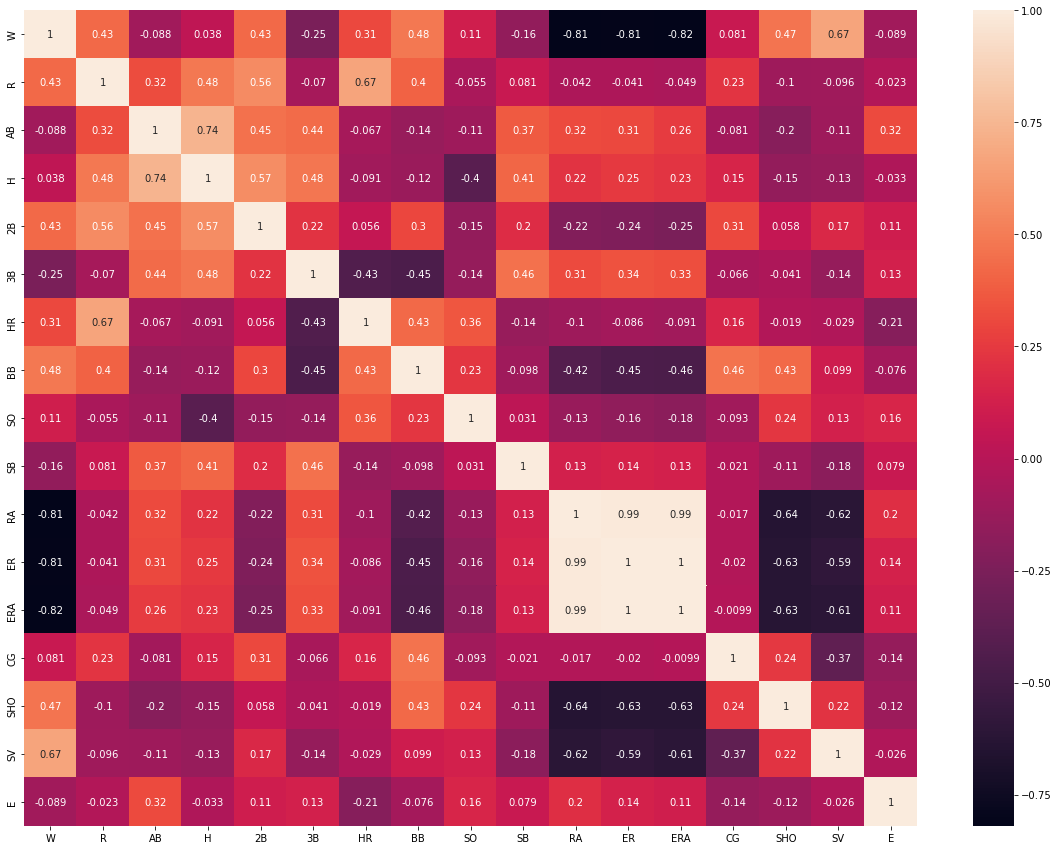

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

<strong>Important observations from correlation Matrix</strong>
<ul>
    <li>W has correlation of 43% with R</li>
    <li>W has correlation of 8.8% with AB</li>
    <li>W has correlation of 3.8% with H</li>
    <li>W has correlation of 43% with 2B</li>
    <li>W has correlation of -25% with 3B</li>
    <li>W has correlation of 31% with HR</li>
    <li>W has correlation of 48% with BB</li>
    <li>W has correlation of 11% with SO</li>
    <li>W has correlation of -16% with SB</li>
    <li>W has correlation of -81% with RA</li>
    <li>W has correlation of -81% with ER</li>
    <li>W has correlation of -82% with ERA</li>
    <li>W has correlation of 8.1% with CG</li>
    <li>W has correlation of 47% with SHO</li>
    <li>W has correlation of 67% with SV</li>
    <li>W has correlation of 8.9% with SV</li>
    <li>ER has correlation of 99% with RA</li>
    <li>ERA has correlation of 99% with RA</li>
    <li>ER has correlation of 100% with ERA</li>
    <li>SHO has correlation of -64% with RA</li>
    <li>SHO has correlation of -63% with ER</li>
    <li>SHO has correlation of -63% with ERA</li>
    <li>SV has correlation of -62% with RA</li>
    <li>SV has correlation of -59% with ER</li>
    <li>SV has correlation of -61% with ERA</li>
</ul>

<h4>Pairplot</h4>

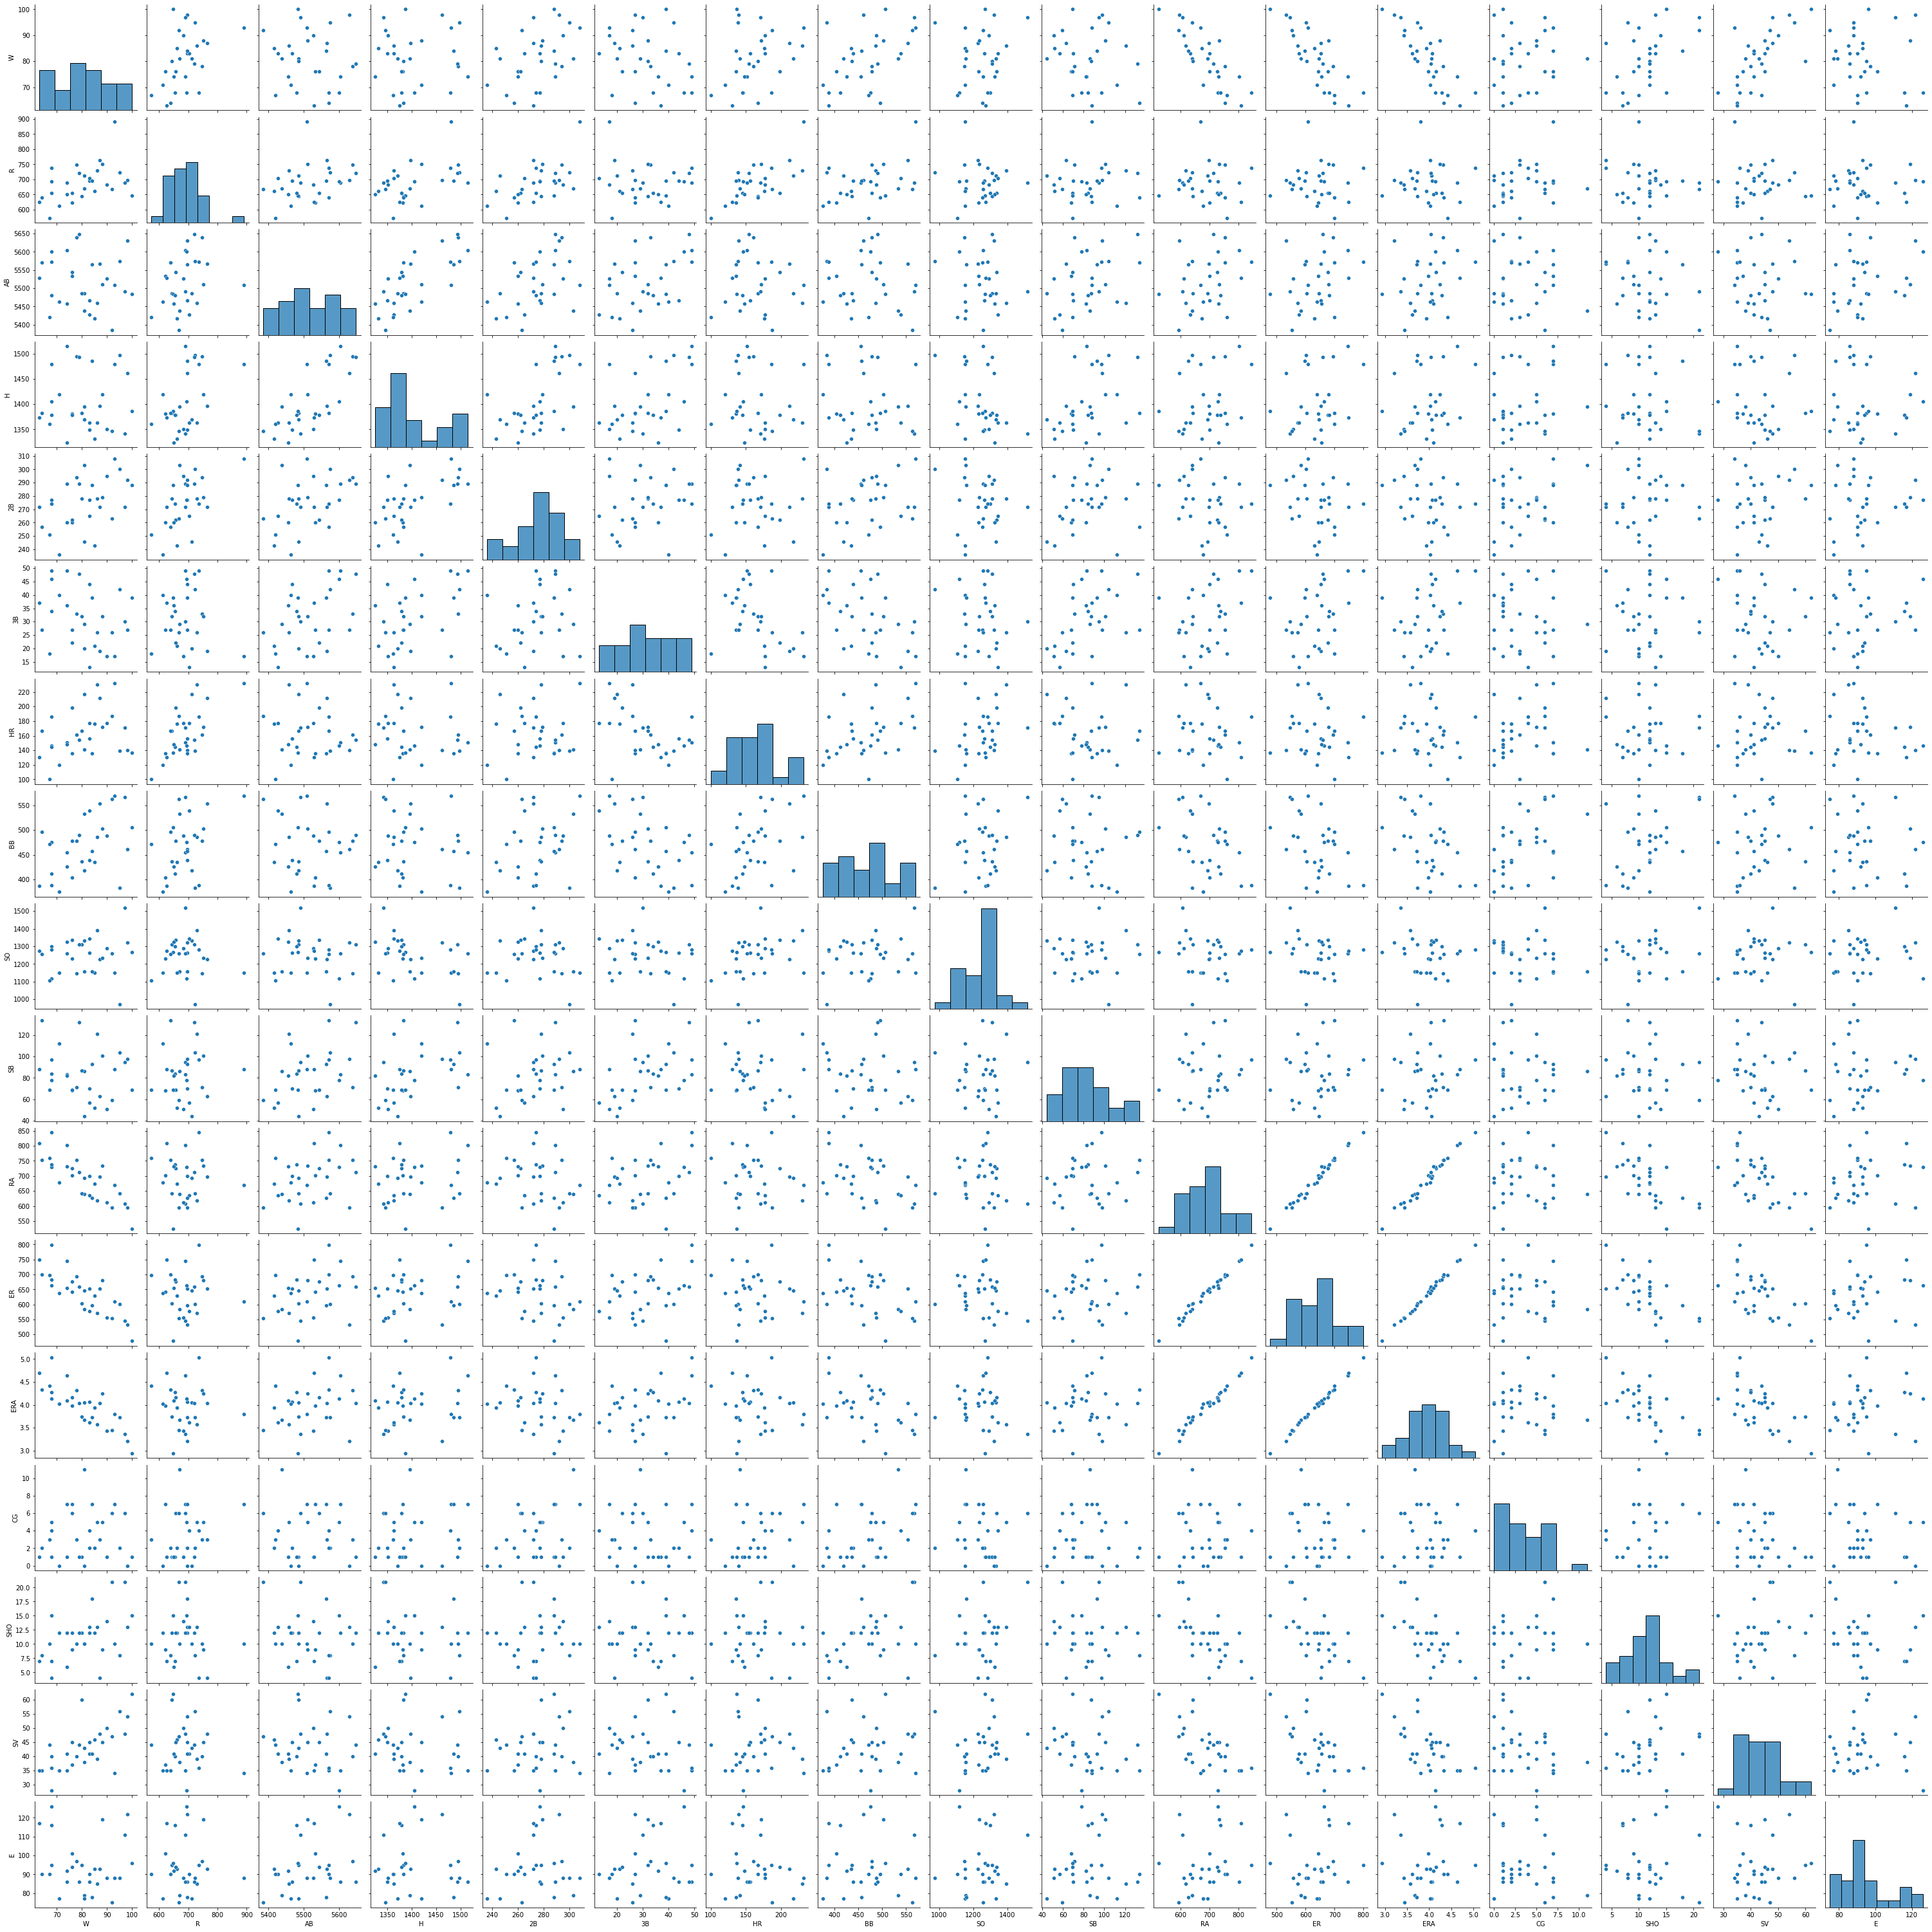

In [21]:
sns.pairplot(data)

<h3>Descrptive Statistics</h3>

In [22]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<ul>
    <li>W
        <ul>
            <li>Mean -: 80.96</li>
            <li>STD -: 10.453455</li>
            <li>Min -: 63.000000</li>
            <li>Max -: 100.000000</li>
        </ul>
    </li>
    <li>R
        <ul>
            <li>Mean -: 688.233333</li>
            <li>STD -: 58.761754</li>
            <li>Min -: 573.000000</li>
            <li>Max -: 891.000000	</li>
        </ul>
    </li>
    <li>AB
        <ul>
            <li>Mean -: 5516.266667</li>
            <li>STD -: 70.467372</li>
            <li>Min -: 5385.000000</li>
            <li>Max -: 5649.000000</li>
        </ul>
    </li>
    <li>H
        <ul>
            <li>Mean -: 1403.533333</li>
            <li>STD -: 57.140923</li>
            <li>Min -: 1324.000000</li>
            <li>Max -: 1515.000000</li>
        </ul>
    </li>
    <li>2B
        <ul>
            <li>Mean -: 274.733333</li>
            <li>STD -: 18.095405</li>
            <li>Min -: 236.000000</li>
            <li>Max -: 308.000000</li>
        </ul>
    </li>
    <li>3B
        <ul>
            <li>Mean -: 31.300000</li>
            <li>STD -: 10.452355</li>
            <li>Min -: 13.000000</li>
            <li>Max -: 49.000000</li>
        </ul>
    </li>
    <li>HR
        <ul>
            <li>Mean -: 163.633333</li>
            <li>STD -: 31.823309</li>
            <li>Min -: 100.000000</li>
            <li>Max -: 232.000000</li>
        </ul>
    </li>
    <li>BB
        <ul>
            <li>Mean -: 469.100000</li>
            <li>STD -: 57.053725</li>
            <li>Min -: 375.000000</li>
            <li>Max -: 570.000000</li>
        </ul>
    </li>
    <li>SO
        <ul>
            <li>Mean -: 1248.20000</li>
            <li>STD -: 103.75947</li>
            <li>Min -: 973.00000</li>
            <li>Max -: 1518.00000</li>
        </ul>
    </li>
    <li>SB
        <ul>
            <li>Mean -: 83.500000</li>
            <li>STD -: 22.815225</li>
            <li>Min -: 44.000000</li>
            <li>Max -: 134.000000</li>
        </ul>
    </li>
    <li>RA
        <ul>
            <li>Mean -: 688.233333</li>
            <li>STD -: 70.140786</li>
            <li>Min -: 525.000000</li>
            <li>Max -: 844.000000</li>
        </ul>
    </li>
    <li>ER
        <ul>
            <li>Mean -: 635.833333</li>
            <li>STD -: 70.140786</li>
            <li>Min -: 478.000000</li>
            <li>Max -: 799.000000</li>
        </ul>
    </li>
    <li>ERA
        <ul>
            <li>Mean -: 3.956333 </li>
            <li>STD -: 0.454089</li>
            <li>Min -: 2.940000</li>
            <li>Max -: 5.040000</li>
        </ul>
    </li>
    <li>CG
        <ul>
            <li>Mean -: 3.466667</li>
            <li>STD -: 2.763473</li>
            <li>Min -: 0.000000</li>
            <li>Max -: 11.000000</li>
        </ul>
    </li>
    <li>SHO
        <ul>
            <li>Mean -: 11.300000</li>
            <li>STD -: 4.120177</li>
            <li>Min -: 4.000000</li>
            <li>Max -: 21.000000</li>
        </ul>
    </li>
    <li>SV
        <ul>
            <li>Mean -: 43.066667</li>
            <li>STD -: 7.869335</li>
            <li>Min -: 28.000000</li>
            <li>Max -: 62.000000</li>
        </ul>
    </li>
    <li>E
        <ul>
            <li>Mean -: 94.333333</li>
            <li>STD -: 13.958889</li>
            <li>Min -: 75.000000</li>
            <li>Max -: 126.000000</li>
        </ul>
    </li>
</ul>

<h3>Looking For Outliers</h3>

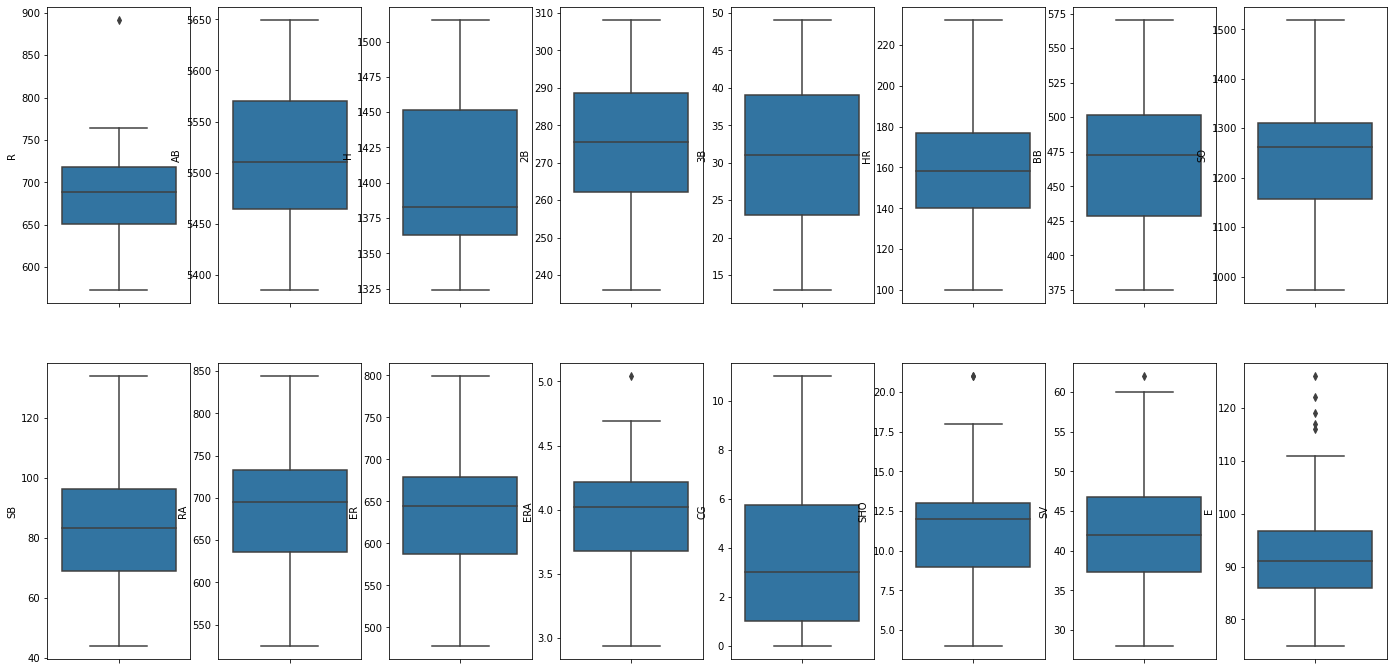

In [23]:
plt.figure(figsize=(24,12))
plotnumber=1

for col in cols:
    plt.subplot(2,8,plotnumber)
    sns.boxplot(y=data[col])
    plotnumber+=1

In [27]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

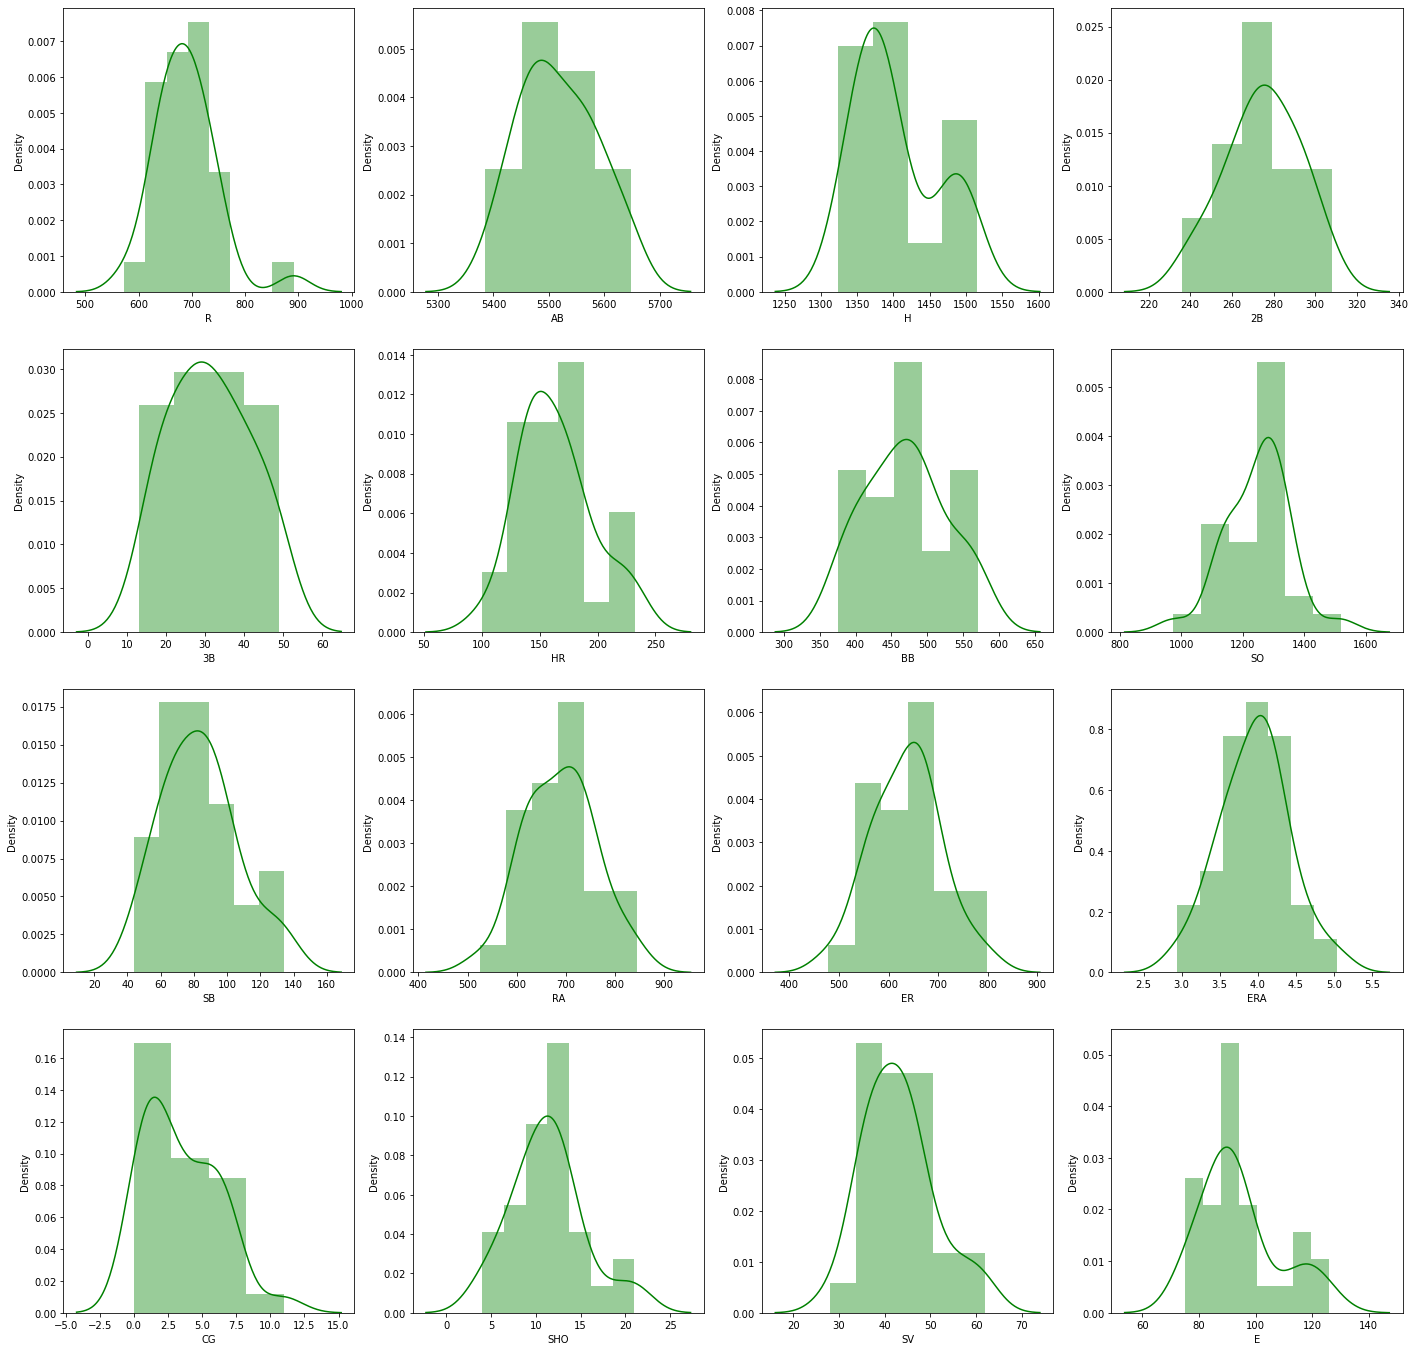

In [28]:
plotnumber=1
plt.figure(figsize=(24,24))
for col in cols:
    plt.subplot(4,4, plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

<strong>Not much outliers in our data except a few in E</strong>

In [67]:
X = data.drop(columns=['W'])

In [68]:
from scipy.stats import zscore
z = np.abs(zscore(X))
print(z.shape)

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

(30, 16)
Old Shape (30, 17)
New Shape (29, 17)
Total Dropped Rows 1


In [69]:
data_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

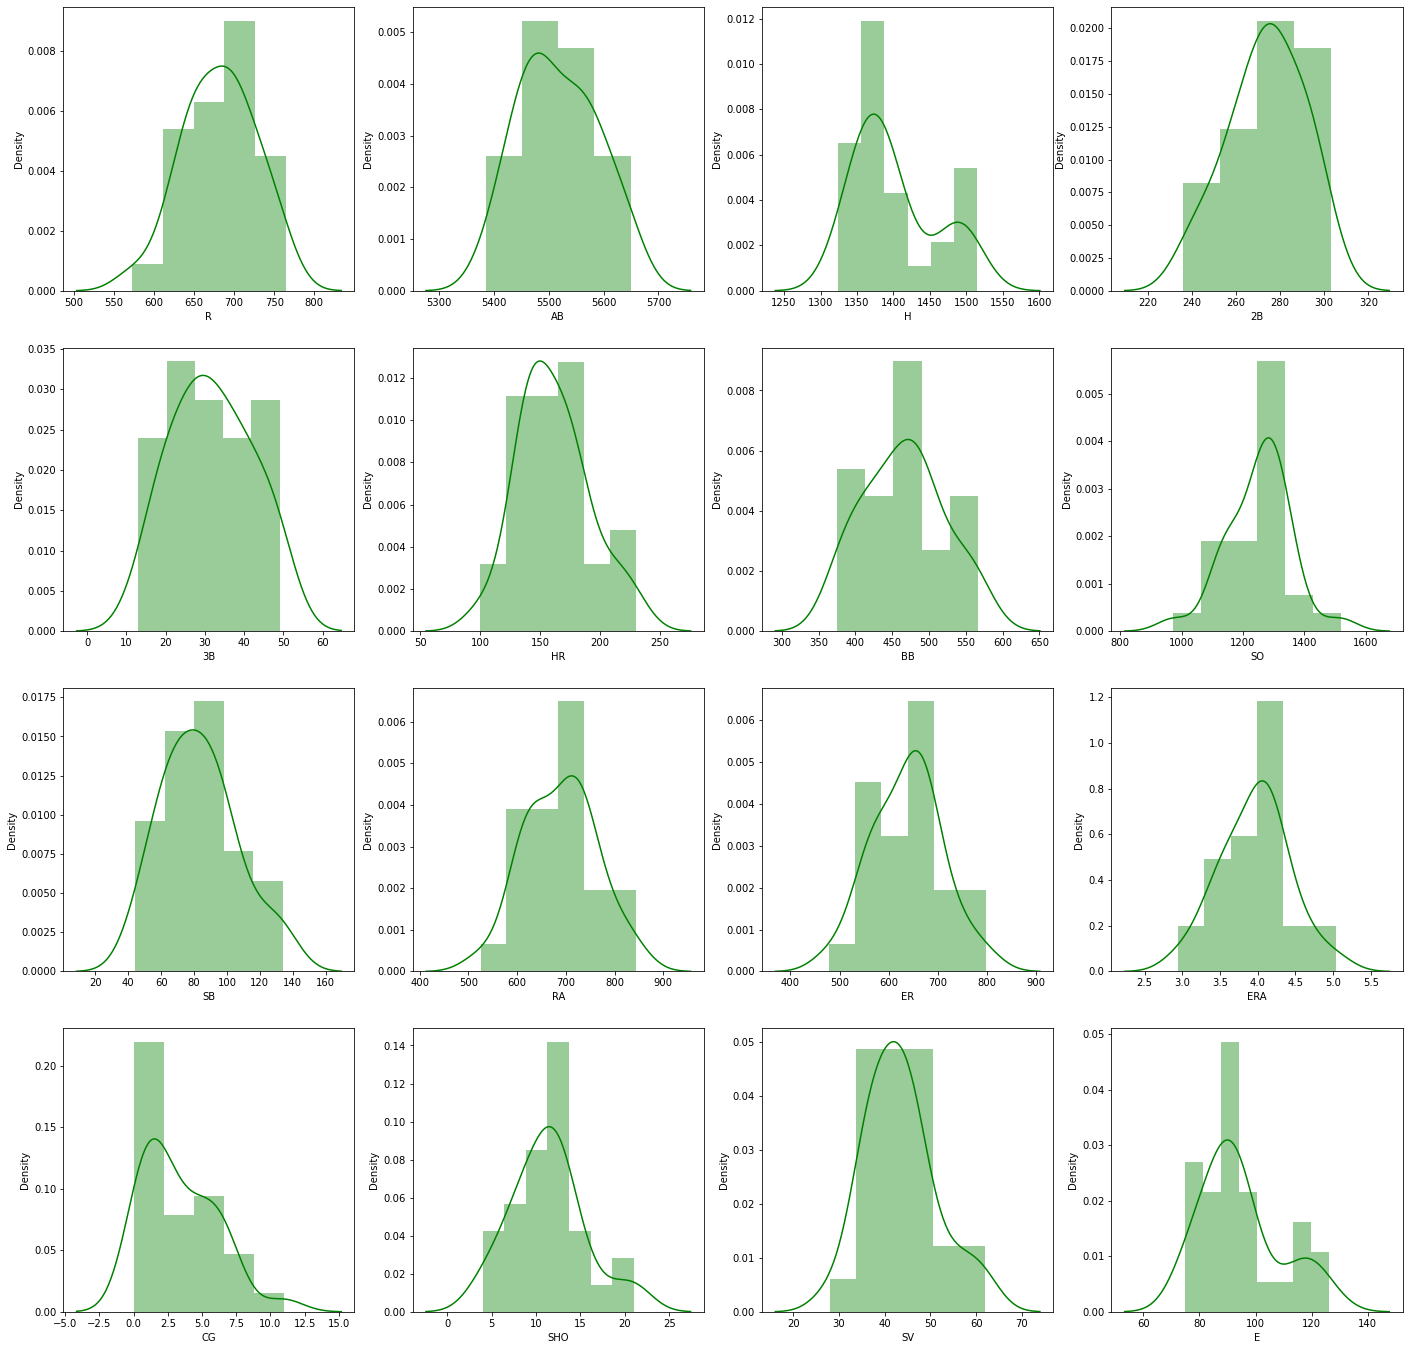

In [70]:
plotnumber=1
plt.figure(figsize=(24,24))
for col in cols:
    plt.subplot(4,4, plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

<h4>Transformation to remove Skew</h4>

In [71]:
X = data_new.drop(columns=['W'])
y = data_new.W

In [72]:
X.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [73]:
from sklearn.preprocessing import power_transform

for col in cols:
    data_new[col] = power_transform(np.array(data_new[col]).reshape(-1,1), method='yeo-johnson').reshape(29,)

In [74]:
data_new.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [75]:
data_new.skew()

W      0.119013
R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

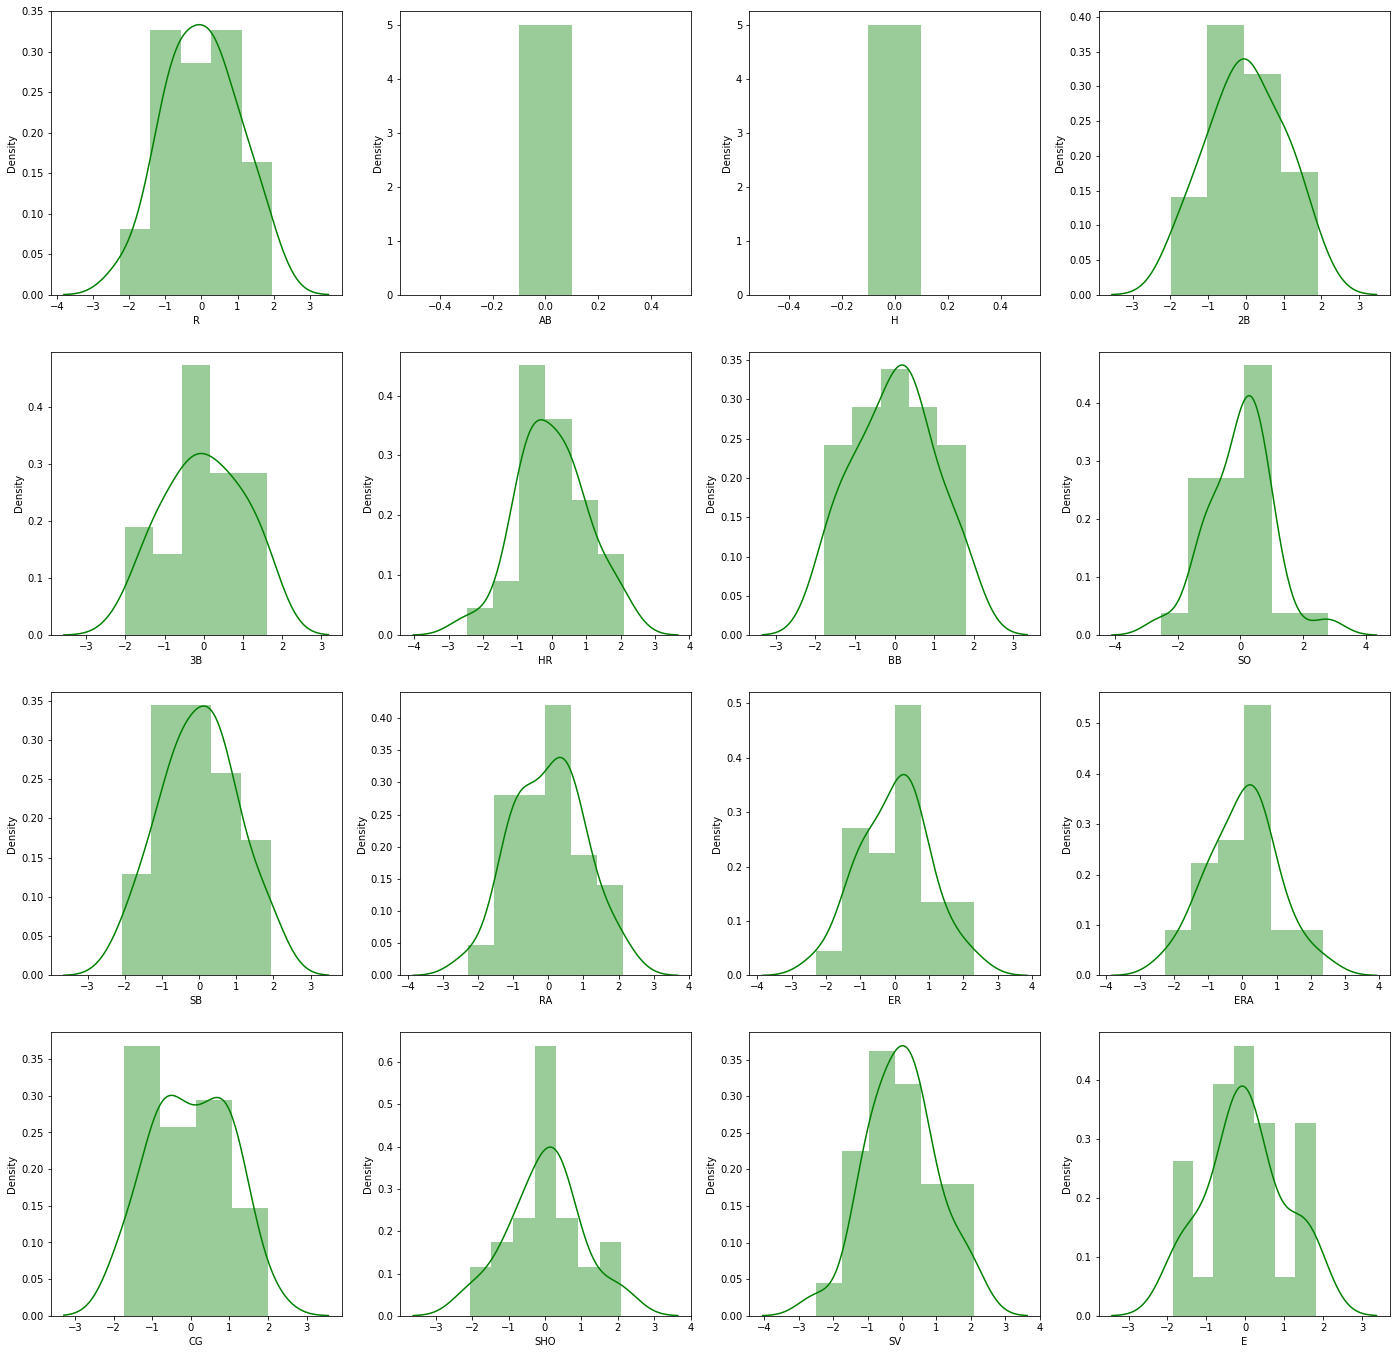

In [77]:
plotnumber=1
plt.figure(figsize=(24,24))
for col in cols:
    plt.subplot(4,4, plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

<strong>Getting original values of H and AB , as pwoer transform has made them all zero</strong>

In [78]:
data_new['H'] = X['H']
data_new['AB'] = X['AB']

In [79]:
data_new.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

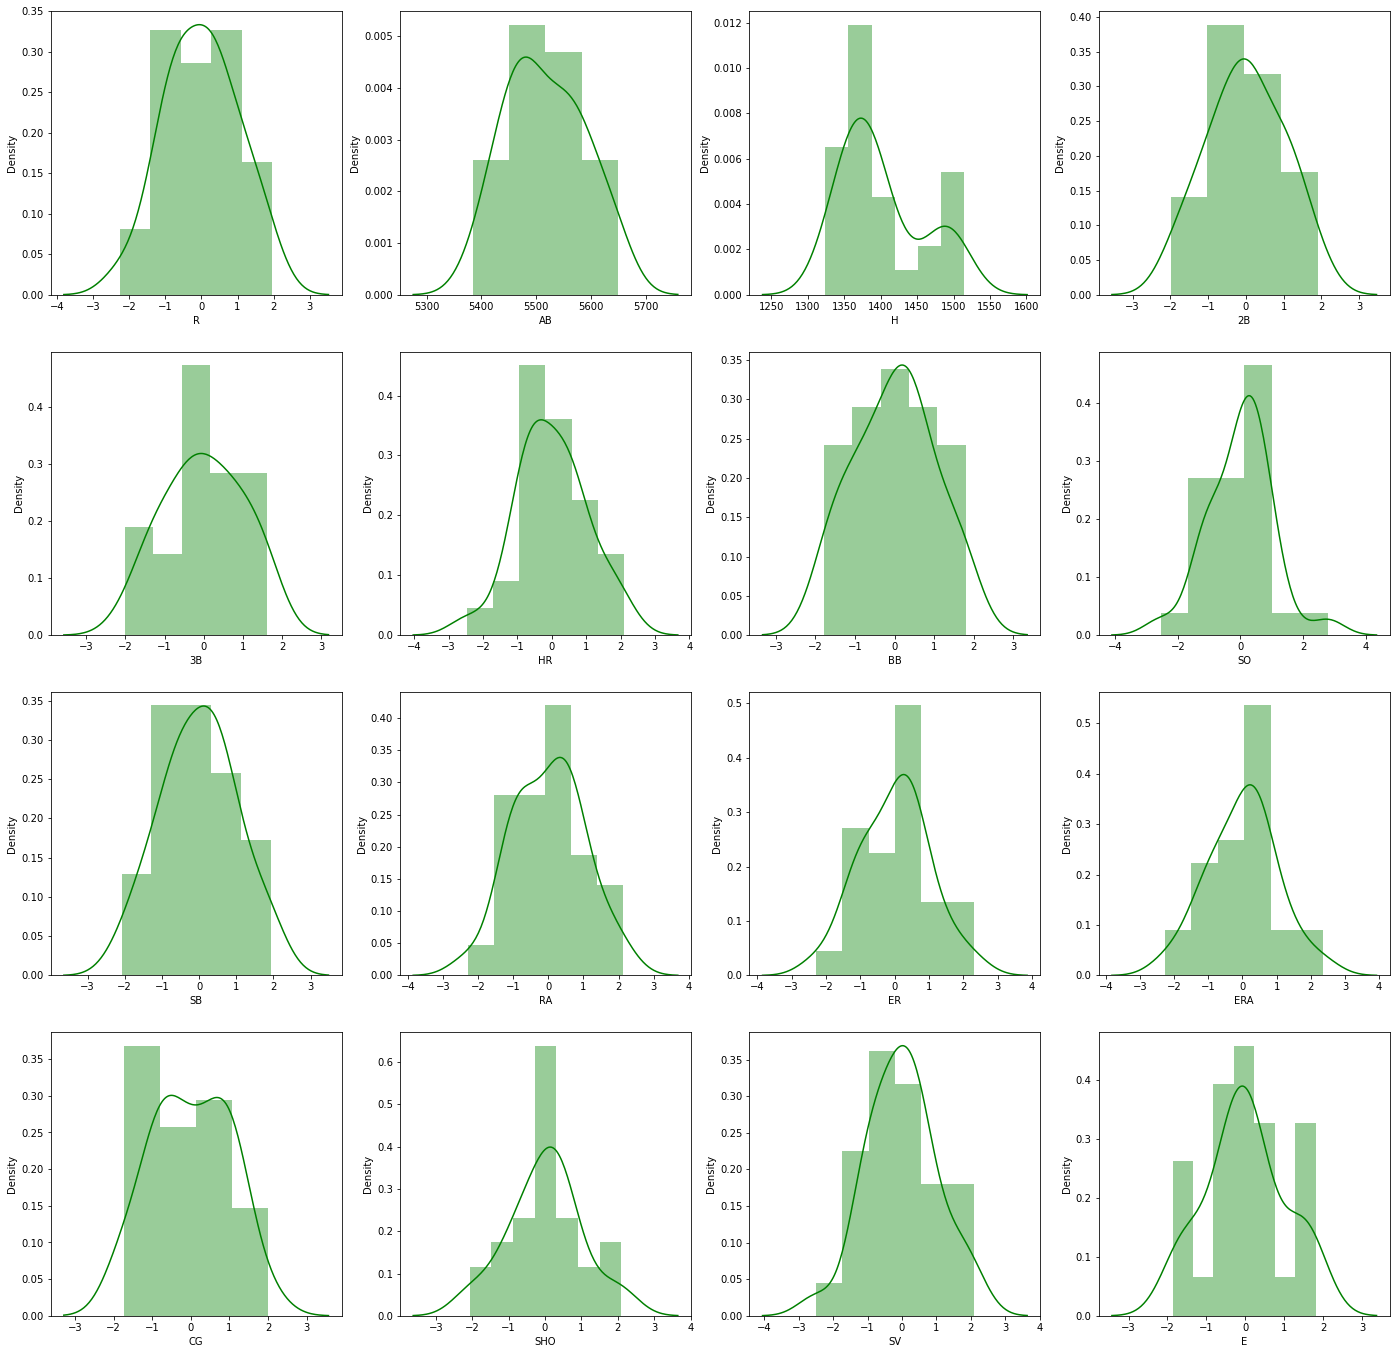

In [80]:
plotnumber=1
plt.figure(figsize=(24,24))
for col in cols:
    plt.subplot(4,4, plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

<h3>Scaling the Dataset</h3>

In [86]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

for col in cols:
    data_new[col] = sc.fit_transform(np.array(data_new[col]).reshape(-1,1)).reshape(29,)

In [87]:
data_new.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [88]:
X = data_new.drop(columns=['W'])
y = data_new.W

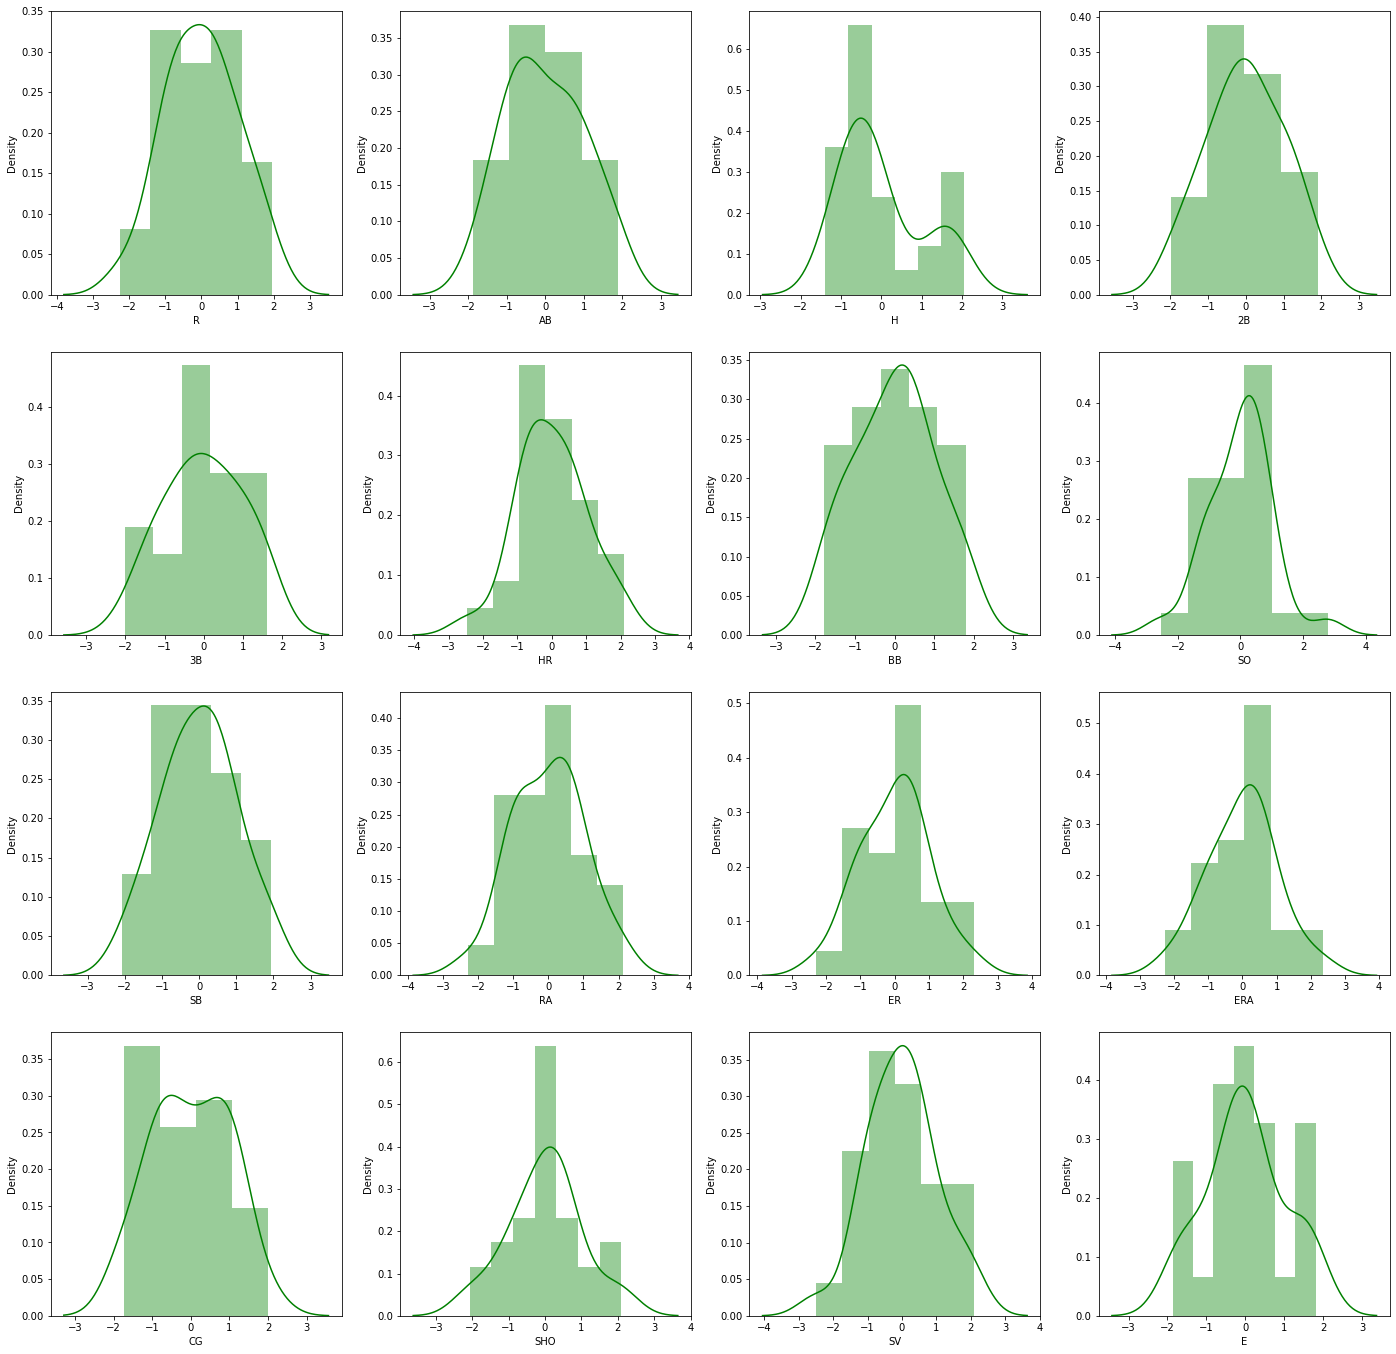

In [89]:
plotnumber=1
plt.figure(figsize=(24,24))
for col in cols:
    plt.subplot(4,4, plotnumber)
    sns.distplot(X[col], color='green')
    plotnumber+=1

<h3>Checking for mutlicollinearity using  VIF</h3>

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.nlargest(16, 'vif')

,vif,Features
10,2351.499351,ER
11,1733.669657,ERA
9,220.030739,RA
1,20.514997,AB
2,10.229859,H
5,8.850171,HR
0,7.168185,R
14,6.360752,SV
13,3.500997,SHO
3,3.492717,2B


<strong>High multicollinearity probelm</strong>

In [93]:
X = X.drop(columns=['ER'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.nlargest(16, 'vif')

,vif,Features
9,138.473148,RA
10,137.040999,ERA
2,9.632176,H
1,7.701816,AB
5,6.656507,HR
0,5.662350,R
6,3.422269,BB
12,3.299050,SHO
3,3.109545,2B
4,2.947373,3B


In [94]:
X = X.drop(columns=['RA'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.nlargest(16, 'vif')

,vif,Features
2,8.583025,H
5,5.737555,HR
0,5.662118,R
1,5.315623,AB
9,4.754969,ERA
11,3.162016,SHO
6,3.091467,BB
3,3.070882,2B
4,2.912518,3B
12,2.503962,SV


In [95]:
X = X.drop(columns=['H'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif.nlargest(16, 'vif')

,vif,Features
4,4.362271,HR
8,4.313698,ERA
0,3.909775,R
2,3.055003,2B
10,2.926292,SHO
3,2.899473,3B
5,2.717461,BB
1,2.455841,AB
6,2.251512,SO
9,2.220509,CG


<strong>Multicollienarity is now below 5 for all columns, we can now build models</strong>

<h3>Building and Training Models</h3>

In [113]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(20, 13)
(9, 13)
(9,)
(20,)


<h4>Linear Regression</h4>

Cross Val Scores [ 0.515499   -0.532993    0.16036886 -7.80329392  0.07049745]
Corss Validation Score Mean===> -1.5179843219703444
________________________________
Training R2 Score : 0.9414557422318485
Training MSE      : 5.443884169215987
Training MAE      : 1.8778237189289697
Training RMSE     : 2.3332132712668994
________________________________
Testing R2 Score : 0.7735764699941611
Testing MSE      : 20.57938306053069
Testing MAE      : 3.7635189609274797
Testing RMSE     : 4.536450491356727


Text(0.5, 1.0, 'Training Data')

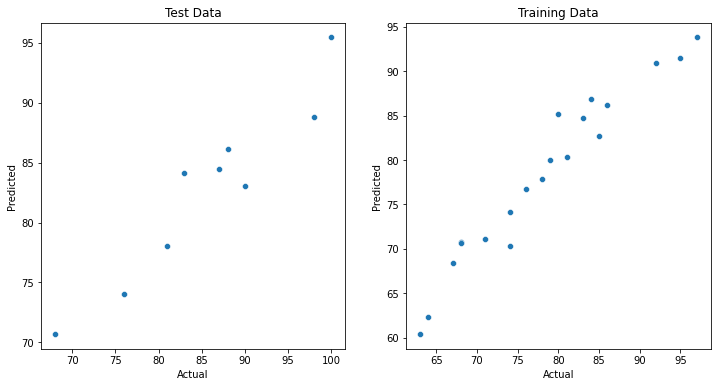

In [116]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print('Cross Val Scores', cross_val_score(lr, X_train, y_train, cv=5, scoring='r2'))
print("Corss Validation Score Mean===>", cross_val_score(lr, X_train, y_train, cv=5).mean())
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [117]:
lrcv = LinearRegression()


grid_parmas = {
    'fit_intercept':[True, False],
    'positive':[True, False]
}
grid_lr = GridSearchCV(lrcv, param_grid = grid_parmas, cv=3, verbose=3)
grid_lr.fit(X_train, y_train)

print('Best Score -:', grid_lr.best_score_)
print('Best Params -:', grid_lr.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .fit_intercept=True, positive=True;, score=0.304 total time=   0.0s
[CV 2/3] END .fit_intercept=True, positive=True;, score=0.651 total time=   0.0s
[CV 3/3] END fit_intercept=True, positive=True;, score=-0.462 total time=   0.0s
[CV 1/3] END fit_intercept=True, positive=False;, score=-0.803 total time=   0.0s
[CV 2/3] END fit_intercept=True, positive=False;, score=0.447 total time=   0.0s
[CV 3/3] END fit_intercept=True, positive=False;, score=-8.963 total time=   0.0s
[CV 1/3] END fit_intercept=False, positive=True;, score=-363.143 total time=   0.0s
[CV 2/3] END fit_intercept=False, positive=True;, score=-84.439 total time=   0.0s
[CV 3/3] END fit_intercept=False, positive=True;, score=-302.745 total time=   0.0s
[CV 1/3] END fit_intercept=False, positive=False;, score=-18291.449 total time=   0.0s
[CV 2/3] END fit_intercept=False, positive=False;, score=-1439.479 total time=   0.0s
[CV 3/3] END fit_intercept=F

Building Model with best Params

Corss Validation Score Mean===> -0.9698189801486926
________________________________
Training R2 Score : 0.8515517724025841
Training MSE      : 13.803829563714714
Training MAE      : 3.039329188674858
Training RMSE     : 3.715350530396118
________________________________
Testing R2 Score : 0.6007139476554597
Testing MSE      : 36.29066564642599
Testing MAE      : 5.0886975848782505
Testing RMSE     : 6.0241734409316265


Text(0.5, 1.0, 'Training Data')

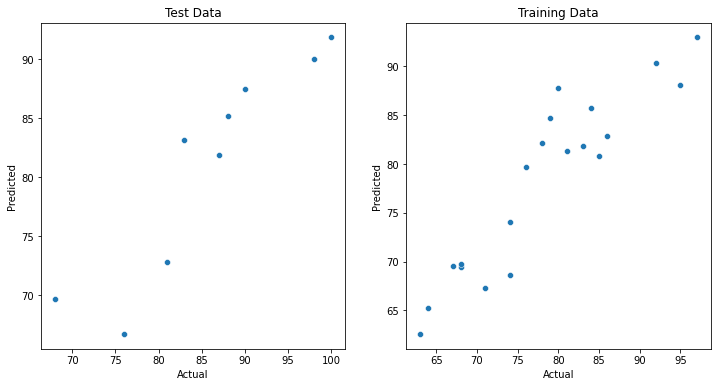

In [118]:
lrcv =  LinearRegression(positive=True)

print("Corss Validation Score Mean===>", cross_val_score(lrcv, X_train, y_train, cv=5).mean())
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lrcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h3>KNeighbors Regressor</h3>

Corss Validation Score Mean===> 0.23674821746120145
________________________________
Training R2 Score : 0.6795268181207152
Training MSE      : 29.799999999999994
Training MAE      : 4.36
Training RMSE     : 5.458937625582472
________________________________
Testing R2 Score : 0.16092909535452304
Testing MSE      : 76.26222222222223
Testing MAE      : 7.488888888888891
Testing RMSE     : 8.732824412652658


Text(0.5, 1.0, 'Training Data')

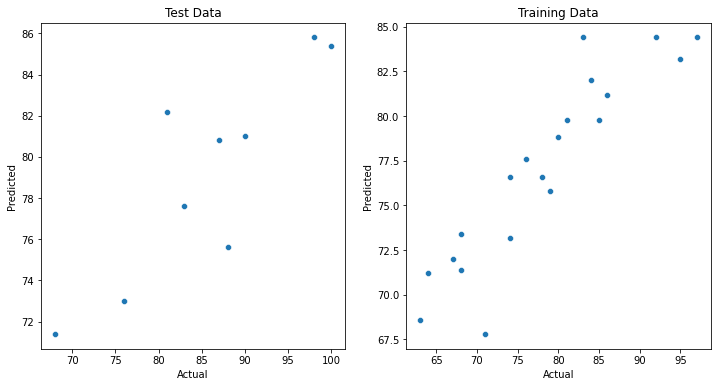

In [119]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
print("Corss Validation Score Mean===>", cross_val_score(knn, X_train, y_train, cv=5).mean())
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knn.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [121]:
knncv = KNeighborsRegressor()

grid_param = {
    'n_neighbors':[3,4,5,6,7],
    'weights' : ['uniform', 'distance'],
    'p':[1,2]
}

grid_knn = GridSearchCV(knncv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=3)
grid_knn.fit(X_train, y_train)

print('Best Score -:', grid_knn.best_score_)
print('Best Params -:', grid_knn.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Score -: 0.15621847263655375
Best Params -: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Building model with best parameters

Corss Validation Score Mean===> -0.4208351636863286
________________________________
Training R2 Score : 1.0
Training MSE      : 0.0
Training MAE      : 0.0
Training RMSE     : 0.0
________________________________
Testing R2 Score : -0.5388822591948181
Testing MSE      : 139.86729866904014
Testing MAE      : 9.956445594678554
Testing RMSE     : 11.826550582018417


Text(0.5, 1.0, 'Training Data')

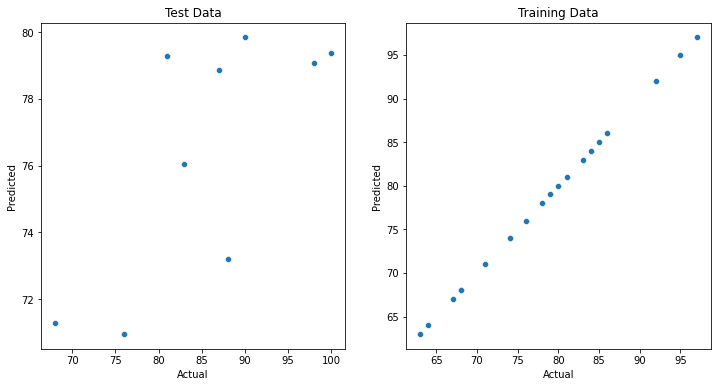

In [126]:
knncv = KNeighborsRegressor(n_neighbors=3, p=1,weights='distance')

print("Corss Validation Score Mean===>", cross_val_score(knncv, X_train, y_train, cv=5).mean())
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knncv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>Simple KNN was doing better as it had the least difference between cross val score and testing score</strong>

<h3>Decision Tree Regressor</h3>

Corss Validation Score Mean===> -4.095779866731955
________________________________
Training R2 Score : 1.0
Training MSE      : 0.0
Training MAE      : 0.0
Training RMSE     : 0.0
________________________________
Testing R2 Score : 0.4315403422982885
Testing MSE      : 51.666666666666664
Testing MAE      : 6.111111111111111
Testing RMSE     : 7.187952884282608


Text(0.5, 1.0, 'Training Data')

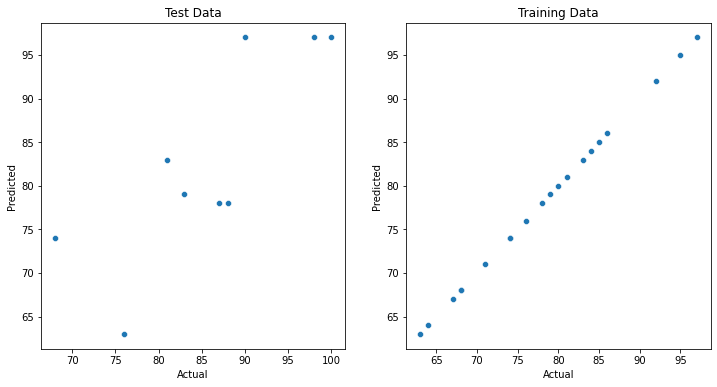

In [127]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
print("Corss Validation Score Mean===>", cross_val_score(dt, X_train, y_train, cv=5).mean())
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dt.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParamter Tuning</h4>

In [131]:
dtcv = DecisionTreeRegressor()

param_grid = {
    'max_depth':[None, 3,4,5,6,7,8,9],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8],
    'max_leaf_nodes':[10,15,20,25,30,35,40,35,50,55,60,75,80, None]
}

grid_dt = GridSearchCV(dtcv, param_grid = param_grid, cv=3)

grid_dt.fit(X_train, y_train)
print('Best Score -->', grid_dt.best_score_)
print('Best Params -->', grid_dt.best_params_)

Best Score --> 0.08868008945728845
Best Params --> {'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 6, 'min_samples_split': 2}


Building Model with best parameters

Corss Validation Score Mean===> -0.2879579631112066
________________________________
Training R2 Score : 0.7460232110050633
Training MSE      : 23.616666666666667
Training MAE      : 4.041666666666667
Training RMSE     : 4.859698207365008
________________________________
Testing R2 Score : 0.07677940776962755
Testing MSE      : 83.91049382716052
Testing MAE      : 8.648148148148149
Testing RMSE     : 9.160267126408515


Text(0.5, 1.0, 'Training Data')

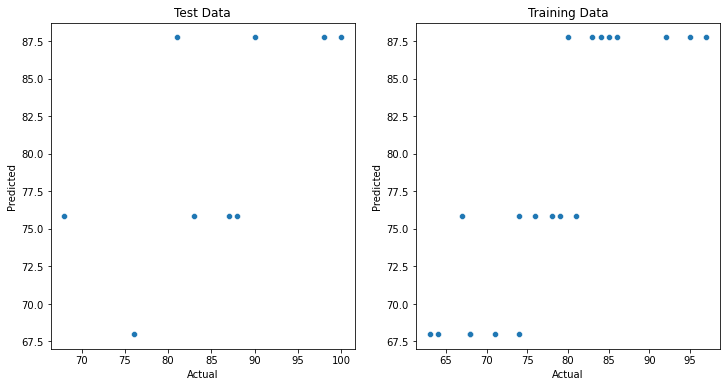

In [133]:
dtcv = DecisionTreeRegressor(max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=2)

print("Corss Validation Score Mean===>", cross_val_score(dtcv, X_train, y_train, cv=5).mean())
dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dtcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>KNN was performing better than this model</strong>

<h3>AdaBoost Regressor</h3>

Corss Validation Score Mean===> -1.6238893456455927
________________________________
Training R2 Score : 0.9927885319113979
Training MSE      : 0.6705763888888883
Training MAE      : 0.5016666666666666
Training RMSE     : 0.8188872870480334
________________________________
Testing R2 Score : 0.30103172447100723
Testing MSE      : 63.5284499314129
Testing MAE      : 7.091358024691358
Testing RMSE     : 7.970473632815863


Text(0.5, 1.0, 'Training Data')

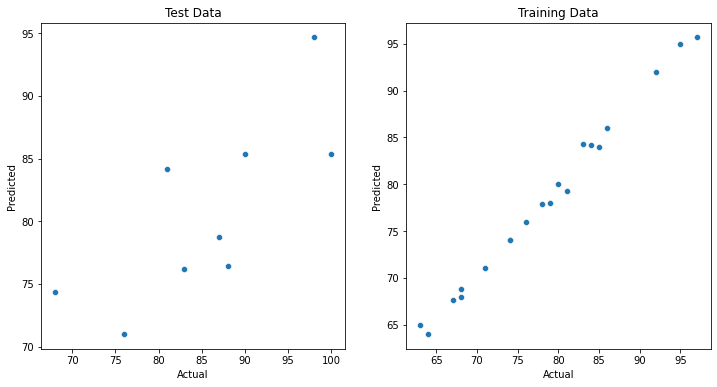

In [134]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()

print("Corss Validation Score Mean===>", cross_val_score(ad, X_train, y_train, cv=5).mean())
ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = ad.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [135]:
adcv = AdaBoostRegressor()

grid_params = {
    'n_estimators':[10,20,30,50,100, 150],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8],
    'loss' : ['linear', 'square', 'exponential']
}

grid_ad = GridSearchCV(adcv, param_grid = grid_params, cv=3, n_jobs=-1)
grid_ad.fit(X_train,y_train)
print('Best Score -->', grid_ad.best_score_)
print('Best Params -->', grid_ad.best_params_)

Best Score --> 0.35134935278057483
Best Params --> {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 10}


Building Model with best Parameters

Corss Validation Score Mean===> -0.06570555000204222
________________________________
Training R2 Score : 0.9874899553404729
Training MSE      : 1.1632777777777785
Training MAE      : 0.7083333333333336
Training RMSE     : 1.0785535581406138
________________________________
Testing R2 Score : -0.15848716381418115
Testing MSE      : 105.29361111111113
Testing MAE      : 9.127777777777778
Testing RMSE     : 10.261267519712716


Text(0.5, 1.0, 'Training Data')

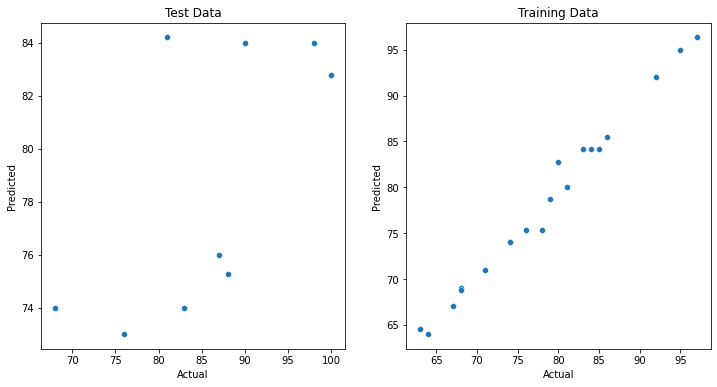

In [138]:
adcv = AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=10)
print("Corss Validation Score Mean===>", cross_val_score(adcv, X_train, y_train, cv=5).mean())
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = adcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>KNN was better performing than this model</strong>

<h3>XGBRegressor</h3>

Corss Validation Score Mean===> -1.6768392222239872
________________________________
Training R2 Score : 0.9999999973219937
Training MSE      : 2.4902110453695057e-07
Training MAE      : 0.0003398895263671875
Training RMSE     : 0.0004990201444199929
________________________________
Testing R2 Score : 0.2515719596903958
Testing MSE      : 68.02379299702847
Testing MAE      : 6.61631605360243
Testing RMSE     : 8.247653787413029


Text(0.5, 1.0, 'Training Data')

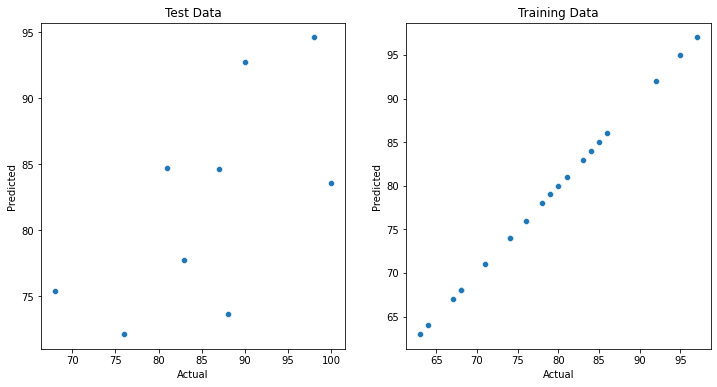

In [139]:
from xgboost import XGBRegressor

xg = XGBRegressor()

print("Corss Validation Score Mean===>", cross_val_score(xg, X_train, y_train, cv=5).mean())
xg.fit(X_train, y_train)

y_pred_train = xg.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xg.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [142]:
xgcv = XGBRegressor()

grid_params = {
    'n_estimators':[10,20,50,100,150, 180,200],
    'max_depth':[2,3,4,5],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
    'n_jobs':[-1]
}

grid_xg = GridSearchCV(xgcv, param_grid=grid_params, cv=3, n_jobs=-1)
grid_xg.fit(X_train, y_train)

print('Best Score -->', grid_xg.best_score_)
print('Best Params -->', grid_xg.best_params_)

Best Score --> 0.2206418746154621
Best Params --> {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 20, 'n_jobs': -1}


Building Model with best Parameters

Corss Validation Score Mean===> -1.5266957971701387
________________________________
Training R2 Score : 0.9995107390422427
Training MSE      : 0.045495153309457234
Training MAE      : 0.17926158905029296
Training RMSE     : 0.21329592895659596
________________________________
Testing R2 Score : 0.39950579836748856
Testing MSE      : 54.578250770599375
Testing MAE      : 6.210644192165798
Testing RMSE     : 7.3877094400496945


Text(0.5, 1.0, 'Training Data')

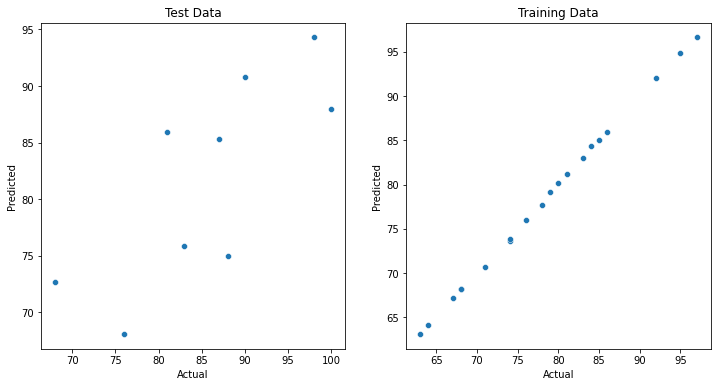

In [143]:
xgcv = XGBRegressor(learning_rate=0.5, max_depth=2, n_estimators=20)
print("Corss Validation Score Mean===>", cross_val_score(xgcv, X_train, y_train, cv=5).mean())
xgcv.fit(X_train, y_train)

y_pred_train = xgcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xgcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>KNeighbors Regressor Model was the best model as it had the leat difference between the cvScore and Testing Score</strong>

<h3>Saving Model</h3>

In [145]:
import pickle

pickle.dump(knn, open('final_model.pickle', 'wb'))